In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import math

In [98]:
def get(tickers, startdata, enddate):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start=startdata, end=enddate)
    datas = map (data,tickers) 
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))


In [99]:
tickers = ['ENGI11.SA']
data = get(tickers, datetime.datetime(2010,1,1), datetime.datetime(2020,1,1))

In [100]:
data

High        Low       Open      Close    Volume  \
Ticker    Date                                                               
ENGI11.SA 2010-01-04   9.360198   9.360198   9.360198   9.360198       0.0   
          2010-01-05   9.540202   9.000191   9.360198   9.495201    1999.0   
          2010-01-06   9.495201   9.405199   9.495201   9.405199    3888.0   
          2010-01-07   9.522202   9.522202   9.522202   9.522202     555.0   
          2010-01-08   9.495201   9.360198   9.495201   9.360198    4444.0   
...                         ...        ...        ...        ...       ...   
          2019-12-20  52.430000  51.750000  52.430000  51.880001  349300.0   
          2019-12-23  51.919998  51.290001  51.599998  51.529999  457100.0   
          2019-12-26  52.820000  51.959999  52.500000  52.770000  540900.0   
          2019-12-27  53.709999  52.619999  53.500000  53.099998  403600.0   
          2019-12-30  54.509998  53.340000  53.570000  54.240002  398500.0   

                      Adj Close  
Ticker    Date                   
ENGI11.SA 2010-01-04   6.056388  
          2010-01-05   6.143740  
          2010-01-06   6.085505  
          2010-01-07   6.161210  
          2010-01-08   6.056388  
...                         ...  
          2019-12-20  49.286942  
          2019-12-23  48.954426  
          2019-12-26  50.132458  
          2019-12-27  50.445961  
          2019-12-30  51.528984  

[2478 rows x 6 columns]

In [101]:
data_retorno_diario = np.log(data.Close.pct_change() +1)
data_retorno_diario.fillna(0, inplace = True)
data_retorno_diario.head()

Ticker     Date      
ENGI11.SA  2010-01-04    0.000000
           2010-01-05    0.014320
           2010-01-06   -0.009524
           2010-01-07    0.012363
           2010-01-08   -0.017160
Name: Close, dtype: float64

In [102]:
def pct(data_close):
    data_pct = (data_close / data_close.shift(1) -1)
    data_pct.fillna(0, inplace=True)
    return data_pct

In [103]:
data['PCT'] = pct(data.Close)
data['PCT'] 

Ticker     Date      
ENGI11.SA  2010-01-04    0.000000
           2010-01-05    0.014423
           2010-01-06   -0.009479
           2010-01-07    0.012440
           2010-01-08   -0.017013
                           ...   
           2019-12-20    0.000772
           2019-12-23   -0.006746
           2019-12-26    0.024064
           2019-12-27    0.006254
           2019-12-30    0.021469
Name: PCT, Length: 2478, dtype: float64

In [104]:
def Volatilidade(data_pct):
    data_vola = data_pct.rolling(252).std() * np.sqrt(252)
    data_vola.fillna(0, inplace=True)
    return(data_vola)

In [105]:
data['Volatilidade'] = Volatilidade(data.PCT) * 100
data['Volatilidade'] 

Ticker     Date      
ENGI11.SA  2010-01-04     0.000000
           2010-01-05     0.000000
           2010-01-06     0.000000
           2010-01-07     0.000000
           2010-01-08     0.000000
                           ...    
           2019-12-20    21.064281
           2019-12-23    21.053954
           2019-12-26    21.078384
           2019-12-27    21.004185
           2019-12-30    21.047089
Name: Volatilidade, Length: 2478, dtype: float64

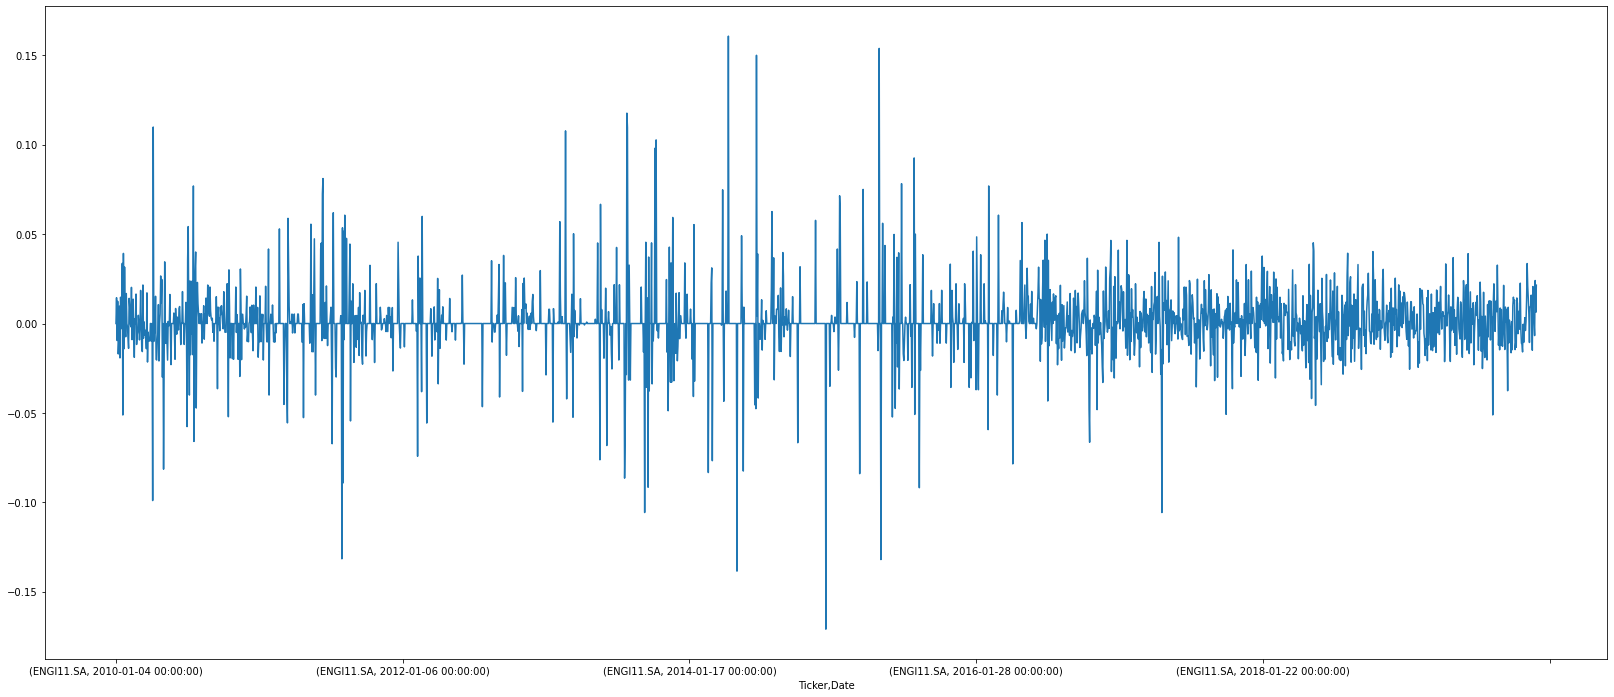

In [106]:
data['PCT'].plot(figsize=(28,12))
plt.show()

In [3]:
from web_scrapping import import_ind

df1, dff2 = import_ind('Vale3')
df1


,indicadores,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,DY,"19,30%","2,75%","2,65%","3,86%","3,29%","0,65%","7,49%","8,63%","5,06%","5,35%","7,31%",0,0,0
1,PL,"4,28","17,30","-42,22","10,50","11,98","10,12","-1,55","123,17","1.664,73","22,93","5,60",0,0,0
2,PEG_RATIO,"0,00","-0,03",-,"0,23","0,37","-0,08","0,00","0,17","-16,84","-0,31",-,0,0,0
3,P_PV,"1,87","2,49","1,74","1,58","1,47","1,06","0,52","0,80","1,29","1,51","1,48",0,0,0
4,EV_EBITIDA,"2,66","6,34","15,85",-,-,-,-,-,-,-,-,0,0,0
5,EV_EBIT,"3,11","9,03","139,25","7,11","7,85","10,44","-5,83","8,81","7,42","18,25","4,79",0,0,0
6,P_EBITIDA,"2,66","6,23","14,32",-,-,-,-,-,-,-,-,0,0,0
7,P_EBIT,"3,12","8,88","125,75","6,24","6,11","6,50","-2,39","5,64","5,73","14,96","4,04",0,0,0
8,VPA,"40,61","35,16","30,56","32,25","27,41","24,26","25,01","27,29","27,65","27,93","26,74",0,0,0
9,P_ATIVO,"0,81","0,97","0,76","0,79","0,64","0,42","0,20","0,38","0,66","0,85","0,89",0,0,0


In [5]:
dff2

,patrimonio_liquido,ativos,ativo_circulante,divida_bruta,disponibilidade,divida_liquida,valor_de_mercado,valor_de_firma,n_total_de_papeis,segmento_de_listagem,free_float
0,208.436.906.000,483.789.293.000,127.068.007.000,69.343.450.000,68.274.694.000,1.068.756.000,390.990.681.674,392.059.437.674,5.132.458.410,Novo Mercado,"95,31%"
